## Лабораторная работа №7

### Задание 2. Проверка непараметрических гипотез

In [165]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

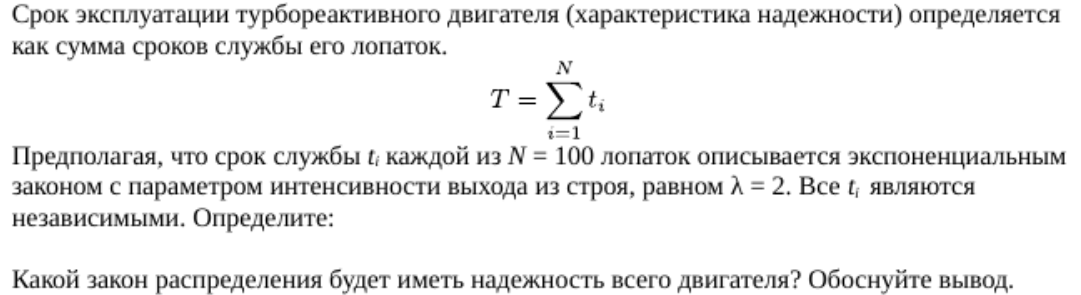

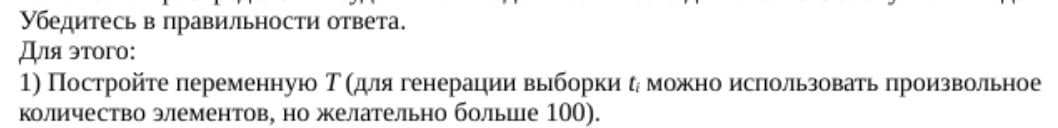

In [166]:
N = 100
l = 2
sample_n = 1000

T = []
for _ in range(sample_n):
    sample_t = stats.expon.rvs(scale=1/l, size=N)
    T.append(np.sum(sample_t))

T = np.array(T)

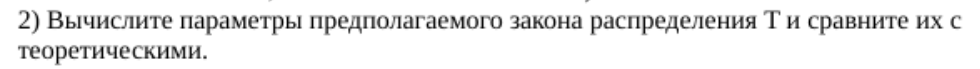

In [167]:
mean_T = np.mean(T)
var_T = np.var(T, ddof=1)

# Мат. ожидание гамма распределения M[X] = k * theta
# Дисперсия гамма распределения D[X] = k * theta**2

calc_t = mean_T ** 2 / var_T
calc_theta = var_T / mean_T

print(f"Вычисленные k = {calc_t} theta = {calc_theta}")

theor_k, _, theor_theta = stats.gamma.fit(T, floc=0)

print(f"Теоретические k = {theor_k} theta = {theor_theta}")


Вычисленные k = 97.49496951232506 theta = 0.5121023807859241
Теоретические k = 98.06612926836318 theta = 0.5091197784026302


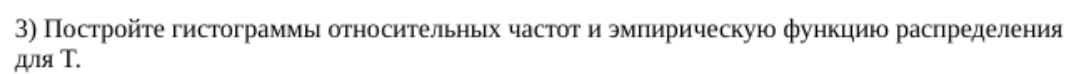

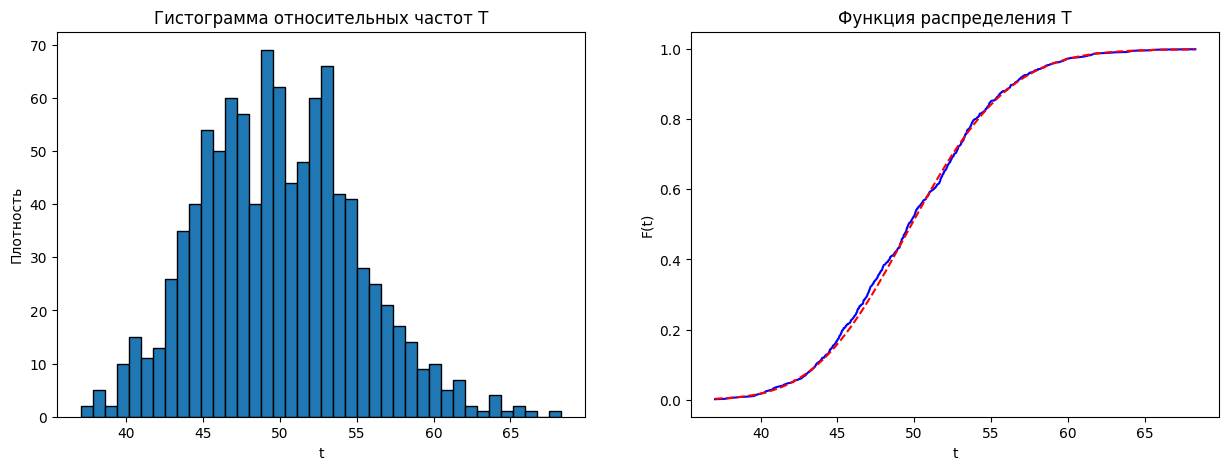

In [168]:
T_sorted = np.sort(T)
p_values = np.arange(1, sample_n+1) / sample_n
gamma_cdf = stats.gamma.cdf(T_sorted, a=N, loc=0, scale=1/l)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(T, bins=40, edgecolor='black')
plt.title("Гистограмма относительных частот T")
plt.xlabel("t")
plt.ylabel("Плотность")

plt.subplot(1, 2, 2)
plt.plot(T_sorted, p_values, 'b')
plt.plot(T_sorted, gamma_cdf, 'r--')
plt.title("Функция распределения T")
plt.xlabel("t")
plt.ylabel("F(t)")
plt.show()

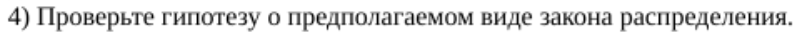

In [169]:
m = int(3.78 * (sample_n - 1)**(2 / 5))
bin_edges = np.linspace(T.min(), T.max(), m + 1)
n_j, _ = np.histogram(T, bins=bin_edges)
n = len(T)

F_edges = stats.gamma.cdf(bin_edges, a=theor_k, loc=0, scale=theor_theta)
p_j = np.diff(F_edges)

chi2_stat = np.sum((n_j - n * p_j)**2 / (n * p_j))
df = m - 1 - 2
p_chi2_value = 1 - stats.chi2.cdf(chi2_stat, df)

print("Критерий Хи-квадрат Пирсона")
print(f"Статистика = {chi2_stat:.4f}, df = {df}, p_value = {p_chi2_value:.4f}")
print("По критерию Хи-квадрат Пирсона принимаем гипотезу H0 о том, что предполагаемый вид ЗР - гамма распределение")

# Критерий Колмогорова
k_stat, k_p_value = stats.kstest(T, 'gamma', args=(N, 0, 1/l))

print("\nКритерий Колмогорова")
print(f"Статистика = {k_stat}, p_value = {k_p_value}")
print("По критерию Колмогорова принимаем гипотезу H0 о том, что предполагаемый вид ЗР - гамма распределение")

Критерий Хи-квадрат Пирсона
Статистика = 62.0049, df = 56, p_value = 0.2707
По критерию Хи-квадрат Пирсона принимаем гипотезу H0 о том, что предполагаемый вид ЗР - гамма распределение

Критерий Колмогорова
Статистика = 0.029242686051848543, p_value = 0.35269998483875975
По критерию Колмогорова принимаем гипотезу H0 о том, что предполагаемый вид ЗР - гамма распределение
